In [1]:
import os
import pandas as pd
import empyrical as ep

In [2]:
import matplotlib as  mpl
mpl.rcParams['font.sans-serif']= ['SimHei']                 # for Chinese display
mpl.rcParams['axes.unicode_minus'] = False  
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

In [3]:
os.chdir('F:\\Frame-sync-w-Zhongyu')

In [4]:
from data_manager.BasicsDataManager import BasicsDataManager
from data_manager.DailyDataManager import DailyDataManager
from data_manager.IndustryDataManager import IndustryDataManager
from data_manager.CommodityPoolManager import CommodityPoolManager
from data_manager.ContDominantDataManager import ContDominantDataManager
from data_manager.FactorDataManager import FactorDataManager

import backtester.weights_utils as wu
import qtgQuants.alphalens as al
import qtgQuants.pyfolio as pf

import utils.clean_and_test as ct
import utils.metrics_utils as mu
import utils.analysis_and_plot as ap

F:\Frame-sync-w-Zhongyu\qtgQuants\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [5]:
bdm = BasicsDataManager()
ddm = DailyDataManager()
idm = IndustryDataManager()
cpm = CommodityPoolManager()
cddm = ContDominantDataManager()
fdm = FactorDataManager()

In [6]:
factor_instace = fdm.get_factor(group='CarryFactor', name='BasisMomentum3',
                                price='close',
                                R=120,
                                window=1,
                                delist=0,
                                filterby='volume',
                                others='near')
factor_value_bm = factor_instace.get_factor_value()

In [7]:
factor_instace = fdm.get_factor(group='CarryFactor', name='MainNearFactor1',
                                price='close',
                                window=1,
                                delist=0,
                                filterby='volume',
                                others='near')
factor_value_rr = factor_instace.get_factor_value()

In [8]:
factor_value_rr

underlying_symbol,A,AG,AL,AP,AU,B,BB,BC,BU,C,...,TA,TF,TS,UR,V,WH,WR,Y,ZC,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-05,0.316719,NaN,0.075016,NaN,-0.013592,0.115761,NaN,NaN,NaN,-0.272505,...,0.101661,NaN,NaN,NaN,NaN,-0.138909,NaN,0.198600,NaN,0.062397
2009-01-06,0.289519,NaN,0.093847,NaN,0.012649,0.235654,NaN,NaN,NaN,-0.258575,...,0.073613,NaN,NaN,NaN,NaN,-0.144658,NaN,0.137516,NaN,0.000000
2009-01-07,0.275481,NaN,0.044290,NaN,0.013719,0.313819,NaN,NaN,NaN,-0.268851,...,0.035645,NaN,NaN,NaN,NaN,-0.078157,NaN,0.264057,NaN,0.060178
2009-01-08,0.345971,NaN,0.096754,NaN,0.009945,-1.449504,NaN,NaN,NaN,-0.324617,...,0.071789,NaN,NaN,NaN,NaN,-0.138839,NaN,0.340622,NaN,0.129731
2009-01-09,0.272736,NaN,0.148456,NaN,0.009293,0.056978,NaN,NaN,NaN,-0.351532,...,0.081695,NaN,NaN,NaN,NaN,-0.147858,NaN,0.298389,NaN,0.011163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,-0.045953,-0.033879,0.003218,0.335304,-0.005814,-0.286652,NaN,-0.063200,-0.120358,0.064566,...,-0.055389,0.013417,0.009176,0.501325,0.260957,-0.016231,0.143789,0.367329,0.554775,-0.005531
2021-06-25,-0.018187,-0.036737,0.009505,0.298983,-0.010751,-0.312401,NaN,0.035248,-0.130515,0.059977,...,-0.060536,0.013015,0.008976,0.449488,0.104715,NaN,0.163288,0.337015,0.587279,-0.008275
2021-06-28,-0.005376,-0.037217,-0.003176,0.308794,-0.010859,-0.322147,NaN,0.005891,-0.131342,0.054837,...,-0.051025,0.013026,0.008579,0.626233,0.213763,NaN,0.149814,0.348836,0.887692,-0.008281


In [9]:
factor_value = (factor_value_rr +factor_value_bm)/2

In [10]:
#factor_value = factor_value_rr

In [11]:
factor_value = factor_value['2010-01-01':]

In [12]:
factor_value 

underlying_symbol,A,AG,AL,AP,AU,B,BB,BC,BU,C,...,TA,TF,TS,UR,V,WH,WR,Y,ZC,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.056685,NaN,-0.116646,NaN,-0.072090,NaN,NaN,NaN,NaN,NaN,...,-0.185091,NaN,NaN,NaN,-0.114737,-0.060638,NaN,NaN,NaN,-0.036793
2010-01-05,0.120925,NaN,-0.134928,NaN,-0.085814,NaN,NaN,NaN,NaN,NaN,...,-0.165508,NaN,NaN,NaN,-0.124426,-0.058850,NaN,NaN,NaN,-0.094171
2010-01-06,0.018409,NaN,-0.127668,NaN,-0.005182,NaN,NaN,NaN,NaN,NaN,...,-0.151201,NaN,NaN,NaN,-0.077876,-0.054700,NaN,NaN,NaN,-0.027736
2010-01-07,0.075412,NaN,-0.092486,NaN,-0.041556,NaN,NaN,NaN,NaN,NaN,...,-0.195487,NaN,NaN,NaN,-0.108405,-0.072761,NaN,NaN,NaN,-0.081714
2010-01-08,0.080896,NaN,-0.086608,NaN,-0.047603,NaN,NaN,NaN,NaN,NaN,...,-0.186245,NaN,NaN,NaN,-0.137896,-0.072305,NaN,NaN,NaN,-0.054231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,-0.087734,-0.005554,-0.013062,0.190034,NaN,-0.335790,NaN,-0.076127,NaN,0.048409,...,-0.003069,NaN,NaN,0.466353,0.128797,NaN,0.133947,0.338112,0.592258,-0.015906
2021-06-25,-0.074640,-0.015020,0.001167,0.158893,NaN,-0.205731,NaN,-0.051638,NaN,0.040620,...,-0.006951,NaN,NaN,0.395727,0.220595,NaN,0.156644,0.299014,0.640878,-0.015601
2021-06-28,-0.062088,-0.013592,-0.019853,0.131719,NaN,-0.231394,NaN,0.095494,NaN,0.025889,...,-0.004347,NaN,NaN,0.597024,0.270050,NaN,0.140695,0.304021,0.936230,-0.025344


In [13]:
factor_value

underlying_symbol,A,AG,AL,AP,AU,B,BB,BC,BU,C,...,TA,TF,TS,UR,V,WH,WR,Y,ZC,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.056685,NaN,-0.116646,NaN,-0.072090,NaN,NaN,NaN,NaN,NaN,...,-0.185091,NaN,NaN,NaN,-0.114737,-0.060638,NaN,NaN,NaN,-0.036793
2010-01-05,0.120925,NaN,-0.134928,NaN,-0.085814,NaN,NaN,NaN,NaN,NaN,...,-0.165508,NaN,NaN,NaN,-0.124426,-0.058850,NaN,NaN,NaN,-0.094171
2010-01-06,0.018409,NaN,-0.127668,NaN,-0.005182,NaN,NaN,NaN,NaN,NaN,...,-0.151201,NaN,NaN,NaN,-0.077876,-0.054700,NaN,NaN,NaN,-0.027736
2010-01-07,0.075412,NaN,-0.092486,NaN,-0.041556,NaN,NaN,NaN,NaN,NaN,...,-0.195487,NaN,NaN,NaN,-0.108405,-0.072761,NaN,NaN,NaN,-0.081714
2010-01-08,0.080896,NaN,-0.086608,NaN,-0.047603,NaN,NaN,NaN,NaN,NaN,...,-0.186245,NaN,NaN,NaN,-0.137896,-0.072305,NaN,NaN,NaN,-0.054231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,-0.087734,-0.005554,-0.013062,0.190034,NaN,-0.335790,NaN,-0.076127,NaN,0.048409,...,-0.003069,NaN,NaN,0.466353,0.128797,NaN,0.133947,0.338112,0.592258,-0.015906
2021-06-25,-0.074640,-0.015020,0.001167,0.158893,NaN,-0.205731,NaN,-0.051638,NaN,0.040620,...,-0.006951,NaN,NaN,0.395727,0.220595,NaN,0.156644,0.299014,0.640878,-0.015601
2021-06-28,-0.062088,-0.013592,-0.019853,0.131719,NaN,-0.231394,NaN,0.095494,NaN,0.025889,...,-0.004347,NaN,NaN,0.597024,0.270050,NaN,0.140695,0.304021,0.936230,-0.025344


In [14]:
group = idm.get_symbol_industry_map(group='actual_industry', name='actual_five_industry')
commodity_pool_instance = cpm.get_commodity_pool(group='DynamicPool', name='DynamicPool5',
                                                 window=20,
                                                 warm_up_days=126,
                                                 entry_only=0,
                                                 min_value=10000,
                                                 filterby='volume',
                                                 exclusionList='ExclusionList3')
commodity_pool_mask = commodity_pool_instance.get_commodity_pool_value()

In [15]:
exclusion_list = []
group_list_after_exclusion = set(group.keys()) - set(exclusion_list)
symbol_list = factor_instace.get_symbol_list()  # original full symbol list
symbol_list_wo_grouping = set(symbol_list) - set(group.keys())
commodity_pool_mask = commodity_pool_mask.filter(items=group_list_after_exclusion)
factor_value = factor_value[commodity_pool_mask]
factor_value = factor_value.stack()

In [16]:
prices = cddm.get_cont_dominant_data_by_field(contract='main', price='close', rebalance_days=1,
                                              style='k', field='continuous_price')

Text(0.5, 1.0, 'Total number of commodity futures')

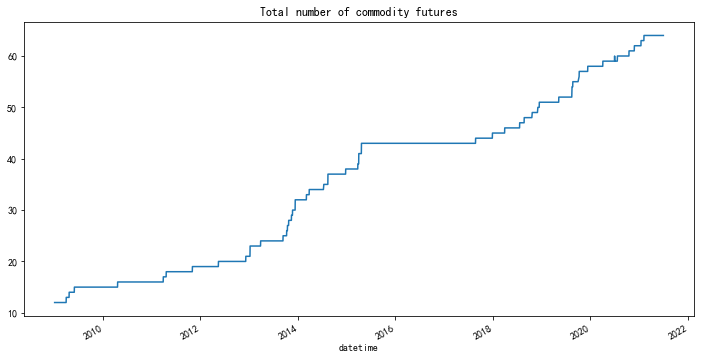

In [17]:
ax = (prices.stack().groupby('datetime').count()-6).plot()
ax.set_title('Total number of commodity futures')

In [18]:
prices = cddm.get_cont_dominant_data_by_field(contract='main', price='close', rebalance_days=1,
                                              style='k', field='continuous_price')
periods = (1, 5, 10)
factor_data1 = al.utils.get_clean_factor_and_forward_returns(factor=factor_value,
                                                            prices=prices,          # has to be wide-form
                                                            groupby=group,
                                                            binning_by_group=True,
                                                            quantiles=5,  # default 5 groups
                                                            bins=None,
                                                            periods=[1,5,10,15,20,25,30,35,40],  # default multi-periods
                                                            filter_zscore=20,
                                                            groupby_labels=None,
                                                            max_loss=0.35,
                                                            zero_aware=False,
                                                            cumulative_returns=True)
factor_data2 = al.utils.get_clean_factor_and_forward_returns(factor=factor_value,
                                                            prices=prices,          # has to be wide-form
                                                            groupby=group,
                                                            binning_by_group=True,
                                                            quantiles=5,  # default 5 groups
                                                            bins=None,
                                                            periods=[1],  # default multi-periods
                                                            filter_zscore=20,
                                                            groupby_labels=None,
                                                            max_loss=0.35,
                                                            zero_aware=False,
                                                            cumulative_returns=True)


Dropped 4.1% entries from factor data: 2.7% in forward returns computation and 1.4% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 1.5% entries from factor data: 0.1% in forward returns computation and 1.4% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [19]:
weights_value1 = wu.equal_weights_from_quantiles(factor_data=factor_data1,
                                              long_quantiles=[5],
                                              short_quantiles=[1],
                                               demeaned=True)

In [20]:
freq1 = factor_data1.index.levels[0].freq

In [21]:
periods1=['1D','5D','10D','15D','20D','25D','30D','35D','40D']

In [22]:
stats_to_2021_F=[]
stats_to_2021_T=[]
cumret_to_2021_F=[]
cumret_to_2021_T=[]
for period in periods1:
    print(period)
    cum_ret_dep1_F,ret_dep1_F = mu.dependent_cum_ret_wo_fee(factor_data1,weights_value1,period,freq1,leverage_up =False,commission_rate =0.0003)
    cum_ret_dep1_T,ret_dep1_T = mu.dependent_cum_ret_wo_fee(factor_data1,weights_value1,period,freq1,leverage_up =True,commission_rate =0.0003)
    stats_to_2021_F.append(ap.show_simple_stats(ret_dep1_F))
    stats_to_2021_T.append(ap.show_simple_stats(ret_dep1_T))
    cumret_to_2021_T.append(cum_ret_dep1_T)
    cumret_to_2021_F.append(cum_ret_dep1_F)

1D
5D
10D
15D
20D
25D
30D
35D
40D


In [23]:
stats_to_2021_T=pd.concat(stats_to_2021_T,axis=1)
stats_to_2021_T.columns=periods1
stats_to_2021_T

,1D,5D,10D,15D,20D,25D,30D,35D,40D
Annual return(%),2.812,4.260,3.949,4.158,3.994,3.840,3.789,3.729,3.681
Annual volatility(%),4.893,4.481,4.416,4.340,4.280,4.239,4.207,4.149,4.094
Cumulative returns(%),35.404,57.863,52.898,56.439,53.876,51.494,50.788,49.930,49.275
Sharpe Ratio,0.592,0.954,0.900,0.961,0.937,0.911,0.906,0.904,0.904
Calmar Ratio,0.223,0.466,0.420,0.475,0.447,0.420,0.414,0.407,0.395
Max drawdown(%),-12.625,-9.149,-9.410,-8.746,-8.941,-9.136,-9.151,-9.162,-9.325


In [24]:
stats_to_2021_F=pd.concat(stats_to_2021_F,axis=1)
stats_to_2021_F.columns=periods1
stats_to_2021_F

,1D,5D,10D,15D,20D,25D,30D,35D,40D
Annual return(%),2.812,4.169,3.700,3.889,3.695,3.525,3.470,3.378,3.317
Annual volatility(%),4.893,4.144,3.958,3.810,3.696,3.604,3.524,3.433,3.344
Cumulative returns(%),35.404,56.364,48.940,52.052,49.077,46.508,45.742,44.421,43.575
Sharpe Ratio,0.592,1.007,0.939,1.021,1.001,0.980,0.986,0.986,0.993
Calmar Ratio,0.223,0.499,0.455,0.523,0.499,0.482,0.483,0.483,0.478
Max drawdown(%),-12.625,-8.359,-8.135,-7.431,-7.400,-7.319,-7.189,-6.988,-6.942


In [25]:
stats_to_2021_F.iloc[[0,1,2,3,5],:]

,1D,5D,10D,15D,20D,25D,30D,35D,40D
Annual return(%),2.812,4.169,3.700,3.889,3.695,3.525,3.470,3.378,3.317
Annual volatility(%),4.893,4.144,3.958,3.810,3.696,3.604,3.524,3.433,3.344
Cumulative returns(%),35.404,56.364,48.940,52.052,49.077,46.508,45.742,44.421,43.575
Sharpe Ratio,0.592,1.007,0.939,1.021,1.001,0.980,0.986,0.986,0.993
Max drawdown(%),-12.625,-8.359,-8.135,-7.431,-7.400,-7.319,-7.189,-6.988,-6.942


In [26]:
cumret_to_2021_F = pd.concat(cumret_to_2021_F,axis=1)
cumret_to_2021_F.columns=periods1
cumret_to_2021_F

,1D,5D,10D,15D,20D,25D,30D,35D,40D
date,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997
2010-01-06,0.997553,0.997553,0.997553,0.997553,0.997553,0.997553,0.997553,0.997553,0.997553
2010-01-07,1.001355,1.001430,1.001430,1.001430,1.001430,1.001430,1.001430,1.001430,1.001430
2010-01-08,1.007264,1.007375,1.007375,1.007375,1.007375,1.007375,1.007375,1.007375,1.007375
...,...,...,...,...,...,...,...,...,...
2021-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436341
2021-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436269
2021-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436179


<AxesSubplot:xlabel='date'>

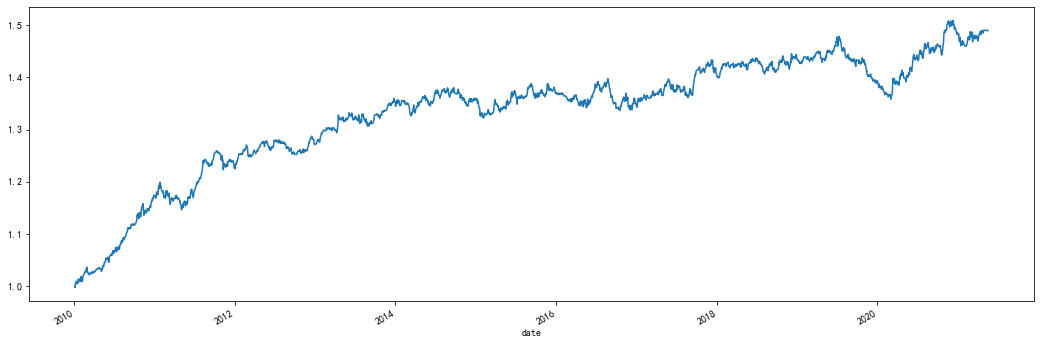

In [27]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(18, 6))
cumret_to_2021_F['10D'].plot(ax=ax)

<AxesSubplot:ylabel='10D'>

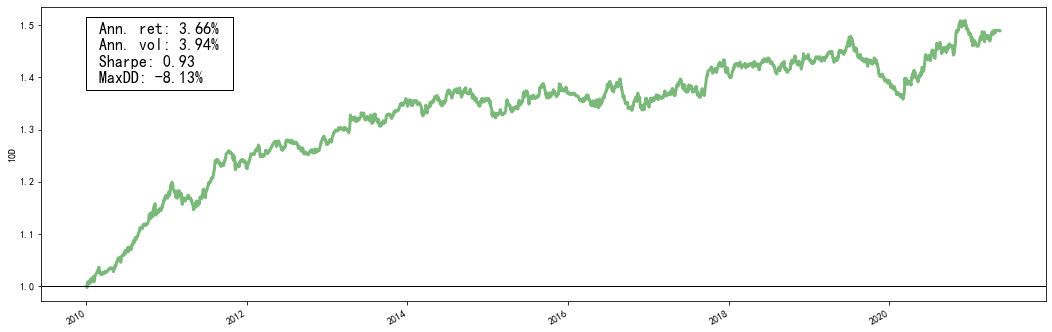

In [28]:
ap.plot_return_series(cumret_to_2021_F['10D'])

In [29]:
bench_ret = factor_data1.groupby('date')['1D'].mean()
bench_ret = bench_ret+1
bench_ret = bench_ret.cumprod()
bench_ret = bench_ret.to_frame('Benchmark')

In [30]:
bench_ret

,Benchmark
date,
2010-01-04,1.008561
2010-01-05,1.012161
2010-01-06,0.999448
2010-01-07,0.989776
2010-01-08,1.008317
...,...
2021-04-23,1.027820
2021-04-26,1.035030
2021-04-27,1.033727


In [31]:
a = cumret_to_2021_F['15D'].to_frame('Strategy')

In [32]:
a = a.merge(bench_ret,how='right',on='date')

Text(0.5, 1.0, 'Cumulative return plot')

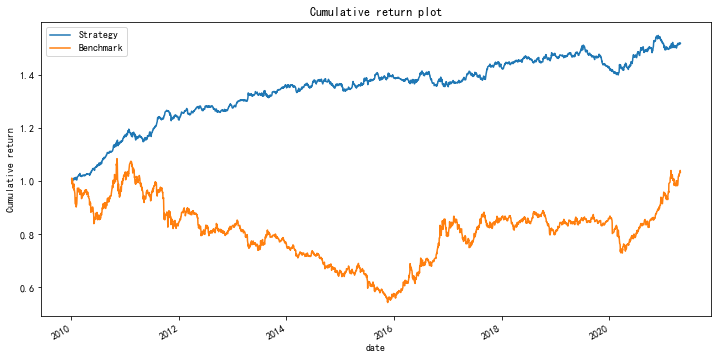

In [33]:
ax = a.plot()
ax.set_ylabel("Cumulative return")
ax.set_title('Cumulative return plot')